<img src="../images/QISKit-c.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="250 px" align="left">

## _*Getting Started with QISKit SDK*_ 

The latest version of this notebook is available on https://github.com/QISKit/qiskit-tutorial.

***
### Contributors
Ismael Faro, Jay Gambetta, Andrew Cross

## QISKit (Quantum Information Software developer Kit)

This tutorial aims to explain how to use QISKit. We assume you have installed QISKit if not please look at [qiskit.org](http://www.qiskit.org) or the install [documentation](https://github.com/QISKit/qiskit-sdk-py/blob/master/doc/install.rst). 

QISKit is a Python software development kit (SDK) that you can use to create your quantum computing programs based on circuits defined through the [OpenQASM 2.0](https://github.com/QISKit/qiskit-openqasm) specification, compile them, and execute them on several backends (real quantum processors online, simulators online, and simulators on local). For the online backends, QISKit uses our [python API connector](https://github.com/QISKit/qiskit-api-py) to the [IBM Q experience project](http://quantumexperience.ng.bluemix.net/).

In addition to this tutorial, we have other tutorials that introduce you to more complex concepts directly related to quantum computing.

More examples:
- Familiarize yourself with the important concepts of [superposition and entanglement](../2_quantum_information/superposition_and_entanglement.ipynb).

## Basic Concept

The basic concept of our quantum program is an array of quantum circuits. The program workflow consists of three stages: [Build](#sectionB), [Compile](#sectionC), and [Run](#sectionR). Build allows you to make different quantum circuits that represent the problem you are solving; Compile allows you to rewrite them to run on different backends (simulators/real chips of different [quantum volumes](http://ibm.biz/qiskit-quantum-volume), sizes, fidelity, etc); and Run launches the jobs.  After the jobs have been run, the data is collected. There are methods for putting this data together, depending on the program. This either gives you the answer you wanted, or allows you to make a better program for the next instance.

### Building your program: Create it  <a id='sectionB'></a>

First you need to import the QuantumProgram package from QISKit.

In [2]:
# Checking the version of PYTHON; we only support > 3.5
import sys
if sys.version_info < (3,5):
    raise Exception('Please use Python version 3.5 or greater.')
    
from qiskit import QuantumProgram
import Qconfig

The basic elements needed for your first program are the QuantumProgram, a Circuit, a Quantum Register, and a Classical Register.

In [3]:
# Creating Programs
# create your first QuantumProgram object instance.
qp = QuantumProgram()

# Creating Registers
# create your first Quantum Register called "qr" with 2 qubits 
qr = qp.create_quantum_register('qr', 2)
# create your first Classical Register  called "cr" with 2 bits
cr = qp.create_classical_register('cr', 2)

# Creating Circuits
# create your first Quantum Circuit called "qc" involving your Quantum Register "qr"
# and your Classical Register "cr"
qc = qp.create_circuit('Circuit', [qr], [cr])

Another option for creating your QuantumProgram instance is to define a dictionary with all the necessary components of your program.

In [4]:
Q_SPECS = {
    'circuits': [{
        'name': 'Circuit',
        'quantum_registers': [{
            'name': 'qr',
            'size': 4
        }],
        'classical_registers': [{
            'name': 'cr',
            'size': 4
        }]}],
}

The required element for a Program is a "circuits" array. Within "circuits", the required field is "name"; it can have several Quantum Registers and Classical Registers. Every register must have a name and the number of each element (qubits or bits).

After that, you can use this dictionary definition as the specs of one QuantumProgram object to initialize it.

In [5]:
qp = QuantumProgram(specs=Q_SPECS)

You can also get every component from your new qp to use.

In [6]:
# Get the components.

# get the circuit by Name
circuit = qp.get_circuit('Circuit')

# get the Quantum Register by Name
quantum_r = qp.get_quantum_register('qr')

# get the Classical Register by Name
classical_r = qp.get_classical_register('cr')

### Building your program: Add Gates to your Circuit
After you create the circuit with its registers, you can add gates to manipulate the registers. Below is a list of the gates you can use in the QX.

You can find extensive information about these gates and how use them in our [Quantum Experience User Guide](https://quantumexperience.ng.bluemix.net/qstage/#/tutorial?sectionId=71972f437b08e12d1f465a8857f4514c&pageIndex=2). 

In [7]:
# Pauli X gate to qubit 1 in the Quantum Register "qr" 
circuit.x(quantum_r[1])

# Pauli Y gate to qubit 2 in the Quantum Register "qr" 
circuit.y(quantum_r[2])

# Pauli Z gate to qubit 3 in the Quantum Register "qr" 
circuit.z(quantum_r[3])

# CNOT (Controlled-NOT) gate from qubit 3 to qubit 2
circuit.cx(quantum_r[3], quantum_r[2])

# add a barrier to your circuit
circuit.barrier()

# H (Hadamard) gate to qubit 0 in the Quantum Register "qr" 
circuit.h(quantum_r[0])

# S Phase gate to qubit 0
circuit.s(quantum_r[0])

# T Phase gate to qubit 1
circuit.t(quantum_r[1])

# identity gate to qubit 1
circuit.iden(quantum_r[1])

# first physical gate: u1(lambda) to qubit 0
circuit.u1(0.3, quantum_r[0])

# second physical gate: u2(phi,lambda) to qubit 1
circuit.u2(0.3, 0.2, quantum_r[1])

# second physical gate: u3(theta,phi,lambda) to qubit 2
circuit.u3(0.3, 0.2, 0.1, quantum_r[2])

# rotation around the x-axis to qubit 0
circuit.rx(0.2, quantum_r[0])

# rotation around the y-axis to qubit 1
circuit.ry(0.2, quantum_r[1])

# rotation around the z-axis to qubit 2
circuit.rz(0.2, quantum_r[2])

# Classical if, from qubit2 gate Z to classical bit 1
# circuit.z(quantum_r[2]).c_if(classical_r, 0)

# measure gate from qubit 0 to classical bit 0
circuit.measure(quantum_r[0], classical_r[0])
circuit.measure(quantum_r[1], classical_r[1])
circuit.measure(quantum_r[2], classical_r[2])

If you want to see what circuits are in your program you can use the get_circuit_names()

In [8]:
qp.get_circuit_names()

dict_keys(['Circuit'])

### Extract QASM

You can obtain a QASM representation of your code.

In [9]:
# QASM from a program

QASM_source = qp.get_qasm('Circuit')

print(QASM_source)

OPENQASM 2.0;
include "qelib1.inc";
qreg qr[4];
creg cr[4];
x qr[1];
y qr[2];
z qr[3];
cx qr[3],qr[2];
barrier qr[0],qr[1],qr[2],qr[3];
h qr[0];
s qr[0];
t qr[1];
id qr[1];
u1(0.300000000000000) qr[0];
u2(0.300000000000000,0.200000000000000) qr[1];
u3(0.300000000000000,0.200000000000000,0.100000000000000) qr[2];
rx(0.200000000000000) qr[0];
ry(0.200000000000000) qr[1];
rz(0.200000000000000) qr[2];
measure qr[0] -> cr[0];
measure qr[1] -> cr[1];
measure qr[2] -> cr[2];



### Visualize Circuit

You can visualize your circuit using QISKit's `latex_drawer`, which plots the unrolled circuit in the specified basis.

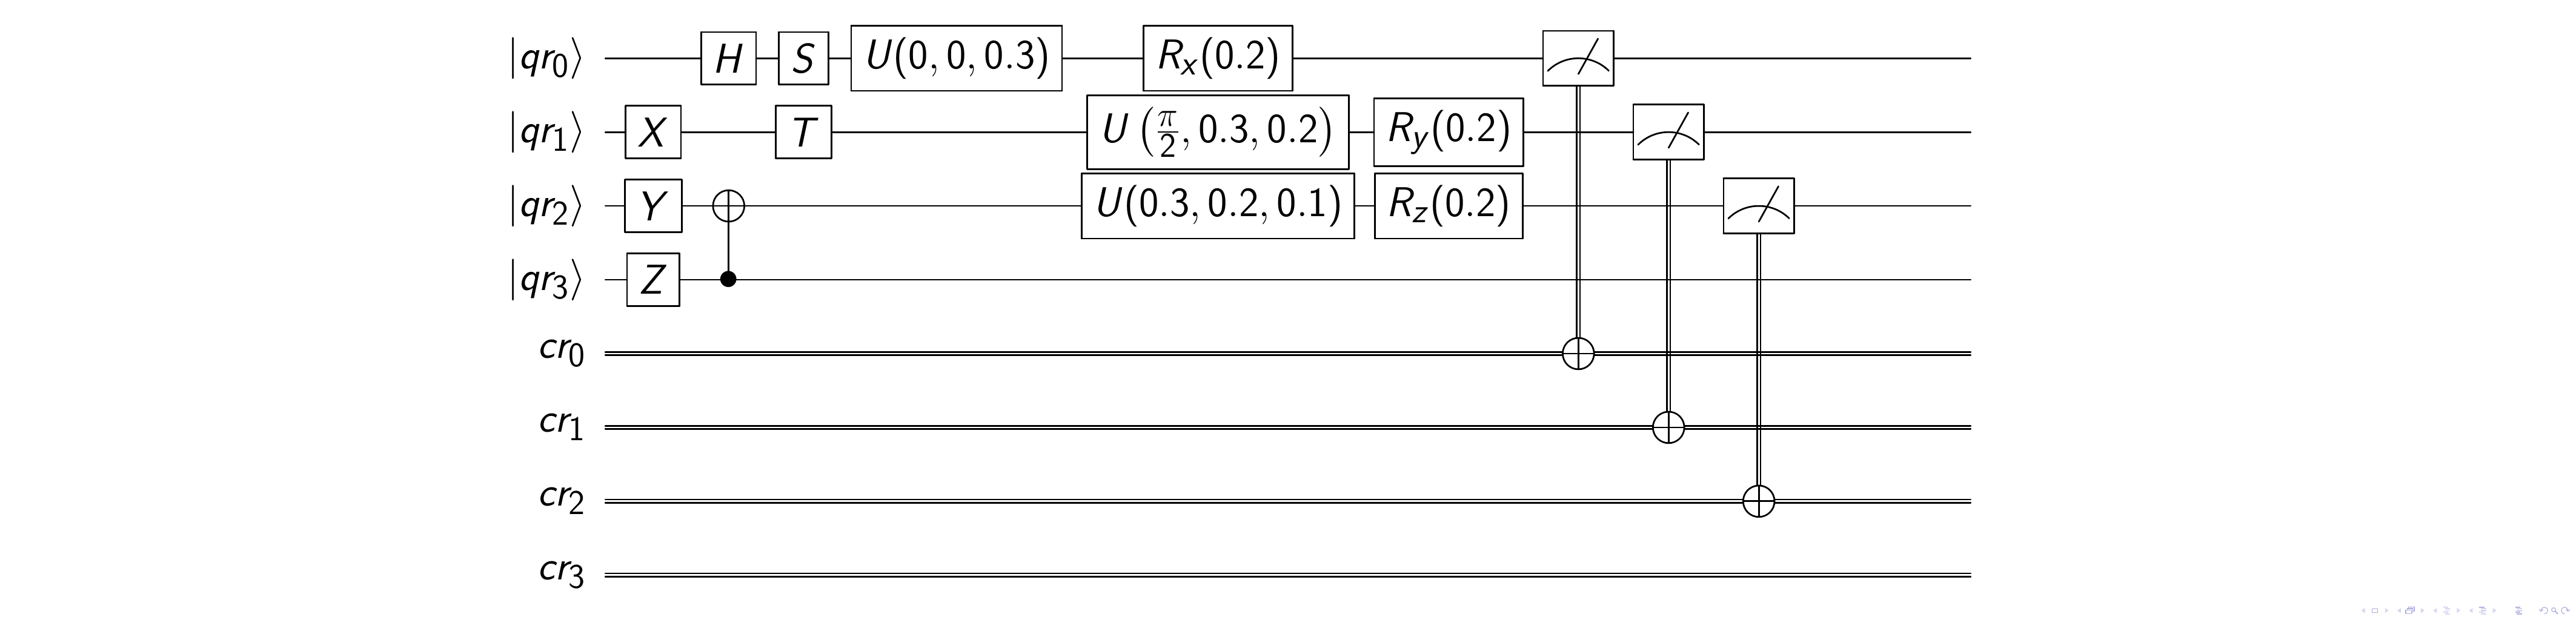

In [10]:
import os
import shutil
from qiskit.tools.visualization import latex_drawer
import pdf2image

def circuitImage(circuit, basis="u1,u2,u3,cx"):
    """Obtain the circuit in image format
    Note: Requires pdflatex installed (to compile Latex)
    Note: Required pdf2image Python package (to display pdf as image)
    """
    filename='circuit'
    tmpdir='tmp/'
    if not os.path.exists(tmpdir):
        os.makedirs(tmpdir)
    latex_drawer(circuit, tmpdir+filename+".tex", basis=basis)
    os.system("pdflatex -output-directory {} {}".format(tmpdir, filename+".tex"))
    images = pdf2image.convert_from_path(tmpdir+filename+".pdf")
    shutil.rmtree(tmpdir)
    return images[0]

basis="u1,u2,u3,cx,x,y,z,h,s,t,rx,ry,rz"
circuitImage(circuit, basis)

### Compile and Run or Execute <a id='sectionC'></a>

First we need to choose the backend. Lets start with the local simulator 

In [11]:
backend = 'local_qasm_simulator' 
circuits = ['Circuit']  # Group of circuits to execute

Next we need to compile the circuits into a quantum object which we call qobj

In [12]:
qobj=qp.compile(circuits, backend) # Compile your program

Then you can run your program. Using wait and timeout we can check the execution result every 2 seconds and timeout if the job is not run in 240 seconds. 

In [13]:
result = qp.run(qobj, wait=2, timeout=240)
print(result)

COMPLETED


When you run a program, the result will be a new object that contains the data, status, and a copy of the qobj. The status of the results can be obtained using print and will one of the follow:

```
JOB_STATUS = {
    inProgress: 'RUNNING',
    errorOnCreate: 'ERROR_CREATING_JOB',
    errorExecuting: 'ERROR_RUNNING_JOB',
    completed: 'COMPLETED'
  };
``` 

### Result
You can access the result via the function 

```get_counts('name')```. 

In [14]:
result.get_counts('Circuit')

{'0000': 15,
 '0001': 6,
 '0010': 6,
 '0011': 3,
 '0100': 375,
 '0101': 234,
 '0110': 223,
 '0111': 162}

In addition to getting the number of times each output was seen, you can get the circuit which was run in QASM format.
For this simulation, the compiled circuit is not much different from the input circuit. Each single-qubit gate has been expressed as a u1, u2, or u3 gate.

In [15]:
ran_qasm = result.get_ran_qasm('Circuit')

print(ran_qasm)

OPENQASM 2.0;
include "qelib1.inc";
qreg qr[4];
creg cr[4];
u1(3.14159265358979) qr[3];
u3(3.14159265358979,1.57079632679490,1.57079632679490) qr[2];
cx qr[3],qr[2];
u3(3.14159265358979,0,3.14159265358979) qr[1];
barrier qr[0],qr[1],qr[2],qr[3];
u2(0,3.14159265358979) qr[0];
u1(1.57079632679490) qr[0];
u1(0.300000000000000) qr[0];
u3(0.200000000000000,-1.57079632679490,1.57079632679490) qr[0];
measure qr[0] -> cr[0];
u1(0.785398163397448) qr[1];
id qr[1];
u2(0.300000000000000,0.200000000000000) qr[1];
u3(0.200000000000000,0,0) qr[1];
measure qr[1] -> cr[1];
u3(0.300000000000000,0.200000000000000,0.100000000000000) qr[2];
u1(0.200000000000000) qr[2];
measure qr[2] -> cr[2];



You can use 

```qp.execute(circuits)```

to combine the compile and run in a single step.

In [16]:
out = qp.execute(circuits, backend, wait=2, timeout=240)
print(out)

COMPLETED


#### Compile Parameters
```qp.compile(name_of_circuits, backend='local_qasm_simulator', config=None, basis_gates=None, coupling_map=None, initial_layout=None, shots=1024, max_credits=10, seed=None, qobj_id=None, hpc=None)```

    - name_of_circuits (list[str]): circuit names to be compiled.
    - backend (str): a string representing the backend to compile to
    - config (dict): a dictionary of configurations parameters for the
        compiler
    - basis_gates (str): a comma seperated string and are the base gates,
                       which by default are provided by the backend
    - coupling_map (dict): A directed graph of coupling:
    - initial_layout (dict): A mapping of qubit to qubit:
    - shots (int): the number of shots 
    - max_credits (int): the max credits to use 3, or 5
    - seed (int): the intial seed the simulatros use
    - qobj_id (str): identifier of the qobj.
    - hpc (dict): This will setup some parameter for
                ibmqx_hpc_qasm_simulator, using a JSON-like format like:
#### Run Parameters
```qp.run(qobj, wait=5, timeout=60)```
     - qobj (dict): the dictionary of the quantum object to run.
     - wait (int): Time interval to wait between requests for results
     - timeout (int): Total time to wait until the execution stops     
#### Execute Parameters 
Execute has the combined parameters of compile and run.

```qp.execute(name_of_circuits, backend='local_qasm_simulator', config=None, wait=5, timeout=60, basis_gates=None, coupling_map=None, initial_layout=None, shots=1024, max_credits=3, seed=None, hpc=None)
```

(**Tip**: You can obtain the above parameters in Jupyter. Simply place the text cursor on a function and press Shift+Tab)

### Execute on a Real Device<a id='sectionR'></a>

In [17]:
qp.set_api(Qconfig.APItoken, Qconfig.config['url']) # set the APIToken and API url
real_device_backend = [backend for backend in qp.online_devices() if qp.get_backend_configuration(backend)['n_qubits'] == 5 and qp.get_backend_status(backend)['available'] == True]
# find an appropriate real device backend that your APIToken has access to run that has 5 qubits and is available

In [21]:
backend = real_device_backend[0]  # Backend where you execute your program; in this case, on the real Quantum Chip online 
circuits = ['Circuit']   # Group of circuits to execute
shots = 1024           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3          # Maximum number of credits to spend on executions. 

result_real = qp.execute(circuits, backend=backend, shots=shots, max_credits=max_credits, wait=10, timeout=240)

Like before, the counts from the execution can be obtained using ```get_counts('name')``` 

In [19]:
result_real.get_counts('Circuit')

{'00000': 46,
 '00001': 23,
 '00010': 12,
 '00011': 20,
 '00100': 336,
 '00101': 229,
 '00110': 242,
 '00111': 116}

In [1]:
%run "../version.ipynb"

Package,Version
QISKit,0.4.8
IBMQuantumExperience,>= 1.8.26
numpy,">= 1.13, < 1.14"
scipy,">= 0.19, < 0.20"
matplotlib,">= 2.0, < 2.1"
